# EDA - Exploring relationships in PHZ Project

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Exploring Relationships Through Correlations
#### 3. Visualizations of Data and Correlations

In [133]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

In [134]:
# define path
path = r"C:\Users\Noah\Achievement 6"

In [135]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Cleaned', 'df_corn_analysis.csv'))

In [136]:
df.head()

,Unnamed: 0,Year,County,State,Zip code,latitude,longitude,Plant Hardiness Zone,Corn Acres Harvested,Sales ($),CV,State ANSI,Ag District,Ag District Code,Concatenated
0,0,2022,CREEK,OKLAHOMA,74010,35.83,-96.39,7b,244.0,71000,0.3,40,CENTRAL,50,CREEKOKLAHOMA2022
1,1,2022,GRADY,OKLAHOMA,73002,34.92,-97.77,7b,3063.0,2834000,0.3,40,CENTRAL,50,GRADYOKLAHOMA2022
2,2,2022,MCCLAIN,OKLAHOMA,73010,35.14,-97.65,7b,3167.0,1941000,0.3,40,CENTRAL,50,MCCLAINOKLAHOMA2022
3,3,2022,PAYNE,OKLAHOMA,74023,35.97,-96.76,7b,401.0,237000,0.3,40,CENTRAL,50,PAYNEOKLAHOMA2022
4,4,2022,MAJOR,OKLAHOMA,73718,36.24,-98.18,7a,4449.0,7794000,0.3,40,NORTH CENTRAL,40,MAJOROKLAHOMA2022


In [137]:
# quick renaming 
df.rename(columns = {'Zip code' : 'Zip Code', 'latitude' : 'Latitude', 'longitude' : 'Longitude', 'Sales ($)' : 'Sales'}, inplace = True)

In [138]:
df.dtypes

Unnamed: 0                int64
Year                      int64
County                   object
State                    object
Zip Code                  int64
Latitude                float64
Longitude               float64
Plant Hardiness Zone     object
Corn Acres Harvested    float64
Sales                     int64
CV                      float64
State ANSI                int64
Ag District              object
Ag District Code          int64
Concatenated             object
dtype: object

## EDA analysis
### Step 1- Correlations

In [140]:
# create a mapping function for converting Plant Hardiness Zone to number for correlation
def convert_alphanumeric(value):
    # Extract the numeric part and the letter part
    if pd.isna(value):
        return None  # Handle NaN values
    num_part = int(value[:-1])
    letter_part = value[-1].lower()
    
    # Create a mapping for letters
    letter_mapping = {'a': 0.1, 'b': 0.2}
    
    # Convert the value to a float
    return num_part + letter_mapping.get(letter_part, 0)

In [141]:
# converting to alphanumeric PHZ
df['Plant Hardiness Zone'] = df['Plant Hardiness Zone'].apply(convert_alphanumeric)


In [142]:
df.head(5)

,Unnamed: 0,Year,County,State,Zip Code,Latitude,Longitude,Plant Hardiness Zone,Corn Acres Harvested,Sales,CV,State ANSI,Ag District,Ag District Code,Concatenated
0,0,2022,CREEK,OKLAHOMA,74010,35.83,-96.39,7.2,244.0,71000,0.3,40,CENTRAL,50,CREEKOKLAHOMA2022
1,1,2022,GRADY,OKLAHOMA,73002,34.92,-97.77,7.2,3063.0,2834000,0.3,40,CENTRAL,50,GRADYOKLAHOMA2022
2,2,2022,MCCLAIN,OKLAHOMA,73010,35.14,-97.65,7.2,3167.0,1941000,0.3,40,CENTRAL,50,MCCLAINOKLAHOMA2022
3,3,2022,PAYNE,OKLAHOMA,74023,35.97,-96.76,7.2,401.0,237000,0.3,40,CENTRAL,50,PAYNEOKLAHOMA2022
4,4,2022,MAJOR,OKLAHOMA,73718,36.24,-98.18,7.1,4449.0,7794000,0.3,40,NORTH CENTRAL,40,MAJOROKLAHOMA2022


In [143]:
# creating numeric df for correlation analysis
columns = ['Year', 'Zip Code', 'Latitude', 'Longitude', 'Plant Hardiness Zone', 'Corn Acres Harvested', 'Sales', 'CV', 'State ANSI', 'Ag District Code']

In [144]:
df_cleaned = df[columns]


In [145]:
#checking current dir
cwd = os.getcwd()
cwd

'C:\\Users\\Noah\\Achievement 6\\03 Scripts'

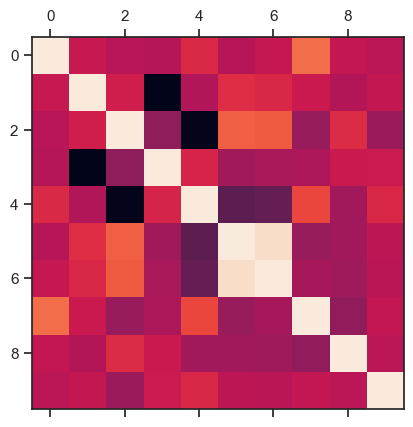

In [216]:
# save figure to current directory
# Save figure
plt.matshow(df_cleaned.corr())
plt.savefig("out.png") 

Text(0.5, 1.0, 'PHZ Correlation Matrix')

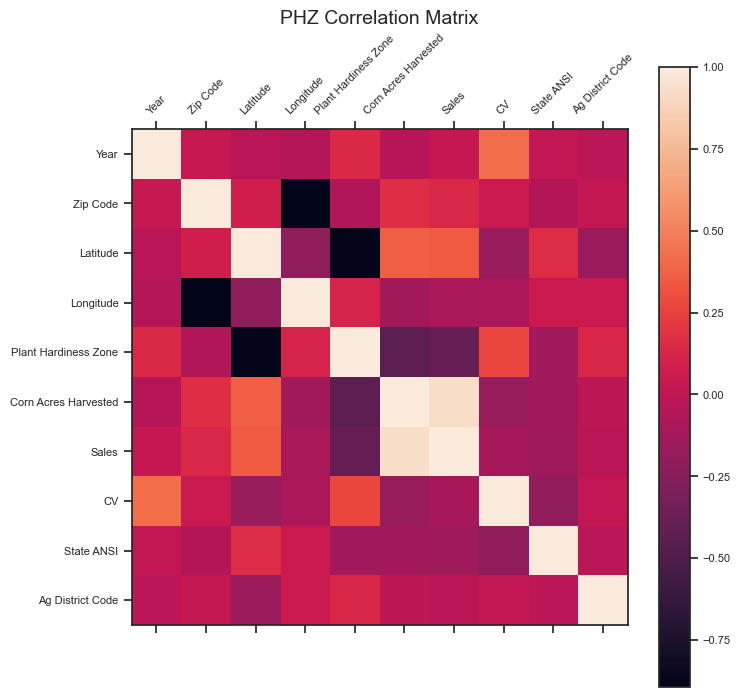

In [147]:
# Add labels, legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_cleaned.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_cleaned.shape[1]), df_cleaned.columns, fontsize=8, rotation=45) # x axis labels
plt.yticks(range(df_cleaned.shape[1]), df_cleaned.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=8) # add font size
plt.title('PHZ Correlation Matrix', fontsize=14) # add title

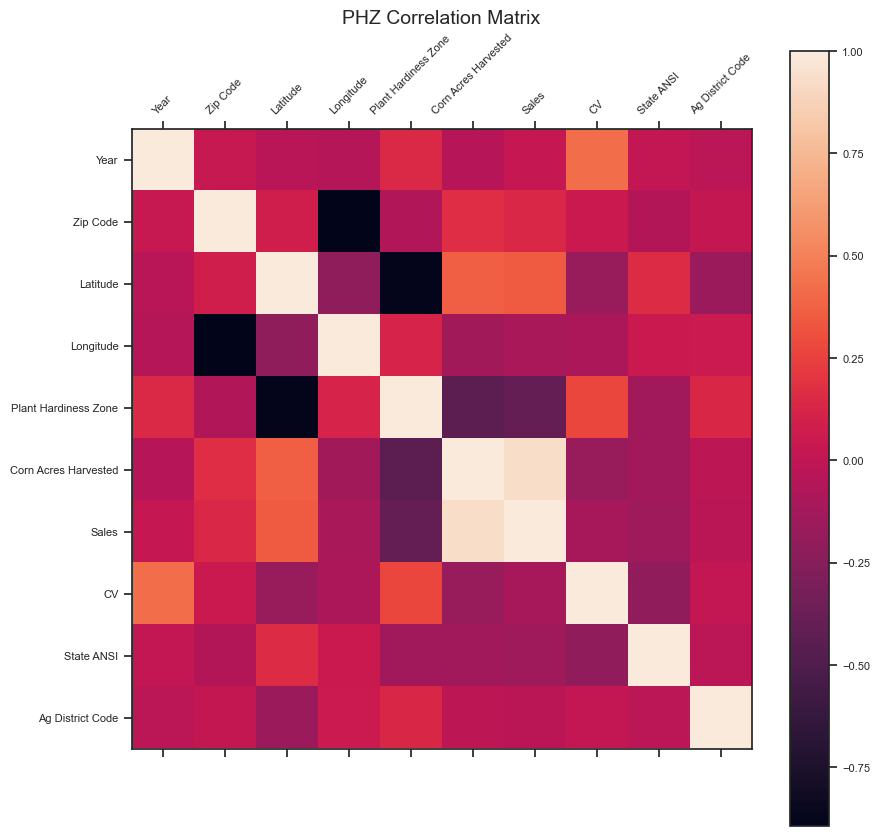

In [148]:
# fixing size

# Calculate the correlation matrix for the cleaned DataFrame slice
corr_matrix = df_cleaned.corr()

# Plot the heatmap
f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(corr_matrix, fignum=f.number) # type of plot

# Set x and y ticks to match the columns of the slice
plt.xticks(range(df_cleaned.shape[1]), df_cleaned.columns, fontsize=8, rotation=45) # x axis labels
plt.yticks(range(df_cleaned.shape[1]), df_cleaned.columns, fontsize=8) # y axis labels

# Add color legend (colorbar)
cb = plt.colorbar() 
cb.ax.tick_params(labelsize=8) 

# Add title
plt.title('PHZ Correlation Matrix', fontsize=14)

# Show the plot
plt.show()

## the strongest correlation is between Sales and Corn Acres Harvested
    Unsurprising- more crops means more $
## there is a strong negative correlation between Latitude and Corn Acres Harvested
    colder climes indicates better production
## There is a strong negative correlation between Plant Hardiness Zone and Latitude
    smaller numbers means more northern

## creating heat map using seaborn

In [151]:
df.columns

Index(['Unnamed: 0', 'Year', 'County', 'State', 'Zip Code', 'Latitude',
       'Longitude', 'Plant Hardiness Zone', 'Corn Acres Harvested', 'Sales',
       'CV', 'State ANSI', 'Ag District', 'Ag District Code', 'Concatenated'],
      dtype='object')

In [152]:
df_cleaned

,Year,Zip Code,Latitude,Longitude,Plant Hardiness Zone,Corn Acres Harvested,Sales,CV,State ANSI,Ag District Code
0,2022,74010,35.83,-96.39,7.2,244.0,71000,0.3,40,50
1,2022,73002,34.92,-97.77,7.2,3063.0,2834000,0.3,40,50
2,2022,73010,35.14,-97.65,7.2,3167.0,1941000,0.3,40,50
3,2022,74023,35.97,-96.76,7.2,401.0,237000,0.3,40,50
4,2022,73718,36.24,-98.18,7.1,4449.0,7794000,0.3,40,40
...,...,...,...,...,...,...,...,...,...,...
5059,2022,25015,38.23,-81.53,7.1,5.0,2000,0.0,54,40
5060,2022,25003,38.28,-81.84,7.1,6.0,2000,0.0,54,40
5061,2022,54514,46.01,-90.49,4.1,1796.0,918000,0.0,55,20
5062,2022,82601,42.83,-106.32,5.1,638.0,1536000,0.0,56,40


In [153]:
# Create a subset excluding the "Date" and "No" columns

sub = df[['Year', 'Zip Code', 'Latitude', 'Longitude','Plant Hardiness Zone', 'Corn Acres Harvested', 'Sales', 'CV', 'State ANSI', 'Ag District Code']]

In [154]:
sub


,Year,Zip Code,Latitude,Longitude,Plant Hardiness Zone,Corn Acres Harvested,Sales,CV,State ANSI,Ag District Code
0,2022,74010,35.83,-96.39,7.2,244.0,71000,0.3,40,50
1,2022,73002,34.92,-97.77,7.2,3063.0,2834000,0.3,40,50
2,2022,73010,35.14,-97.65,7.2,3167.0,1941000,0.3,40,50
3,2022,74023,35.97,-96.76,7.2,401.0,237000,0.3,40,50
4,2022,73718,36.24,-98.18,7.1,4449.0,7794000,0.3,40,40
...,...,...,...,...,...,...,...,...,...,...
5059,2022,25015,38.23,-81.53,7.1,5.0,2000,0.0,54,40
5060,2022,25003,38.28,-81.84,7.1,6.0,2000,0.0,54,40
5061,2022,54514,46.01,-90.49,4.1,1796.0,918000,0.0,55,20
5062,2022,82601,42.83,-106.32,5.1,638.0,1536000,0.0,56,40


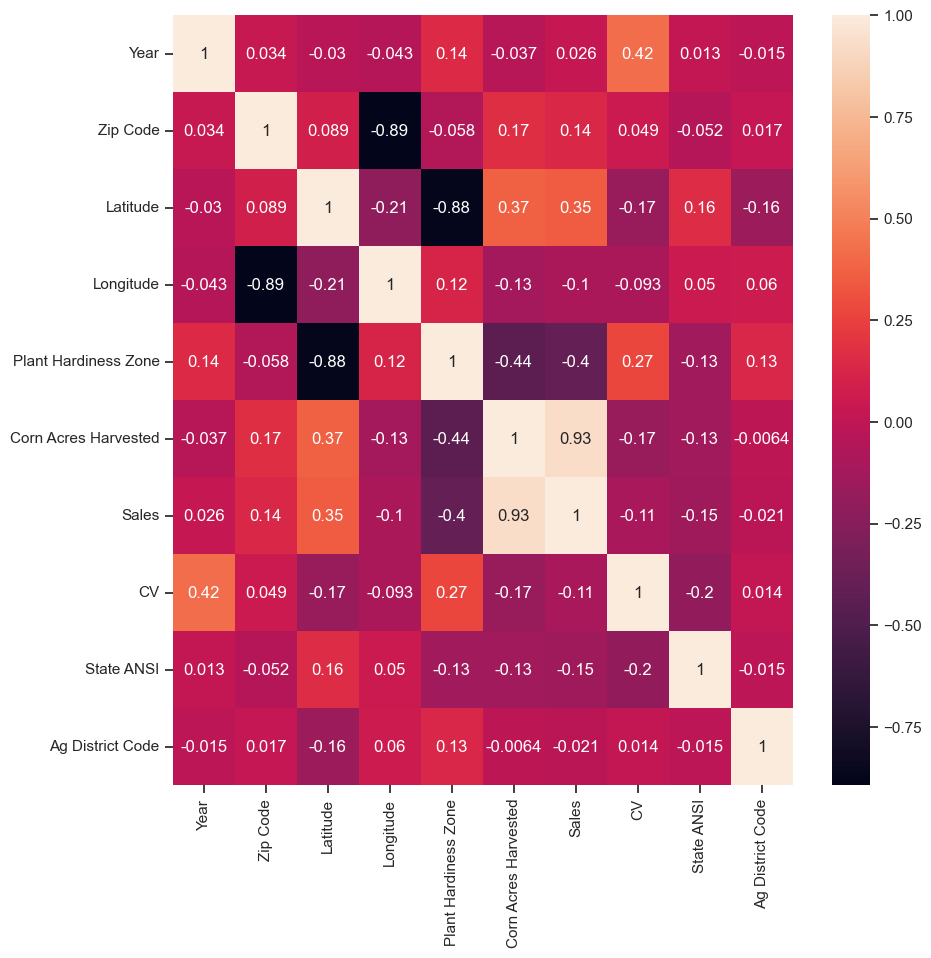

In [227]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_cleaned.corr(), annot = True, ax = ax)

# save figure to current directory
# Save figure
plt.savefig("out.png")
plt.show()

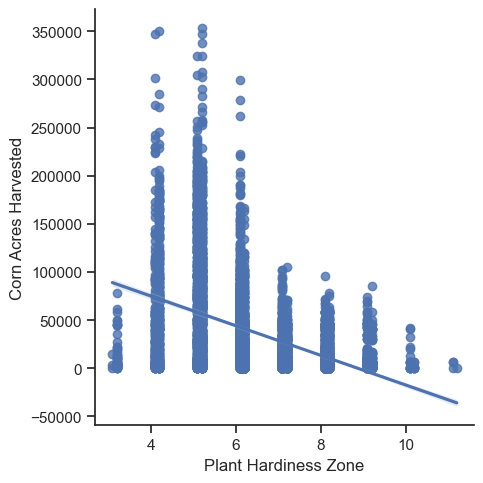

In [229]:
# Create a scatterplot for the "PHZ" and Corn Acres Harvested

sns.lmplot(x = 'Plant Hardiness Zone', y = 'Corn Acres Harvested', data = df)
plt.savefig("out.png")
plt.show()

## Zones 4 and 5 are best for corn production. Zone 3 is too cold, and zones 7+ are too hot

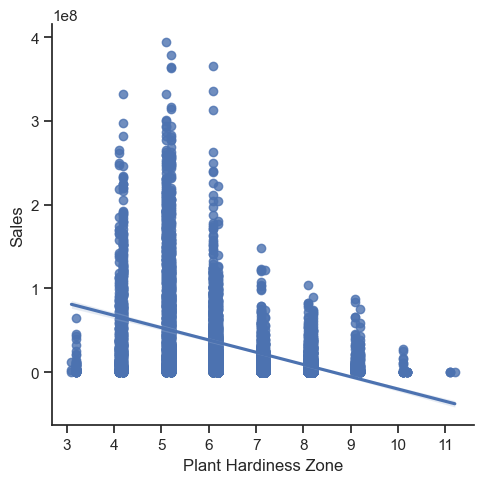

In [231]:
# Create a scatterplot for the "PHZ" and Sales

sns.lmplot(x = 'Plant Hardiness Zone', y = 'Sales', data = df)
plt.savefig("out.png")
plt.show()

## practically identical to PHZ vs Acres harvested scatter

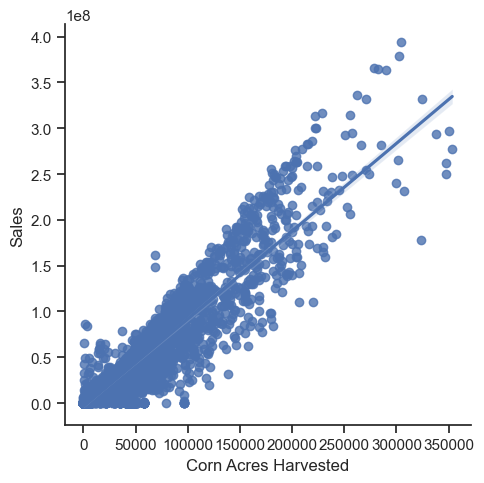

In [235]:
# Create a scatterplot for the Corn acres and sales


sns.lmplot(x = 'Corn Acres Harvested', y = 'Sales', data = df)
plt.savefig("out.png")
plt.show()

# more acres harvested = more sales

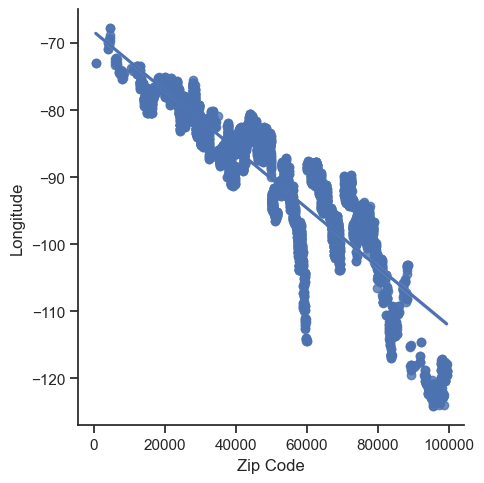

In [233]:
# creating a scatter for zip code and longitude
sns.lmplot(x = 'Zip Code', y = 'Longitude', data = df)
plt.savefig("out.png")
plt.show()

## it appears zip codes increase as the geographic location moves west. Makes sense since the US expanded westward

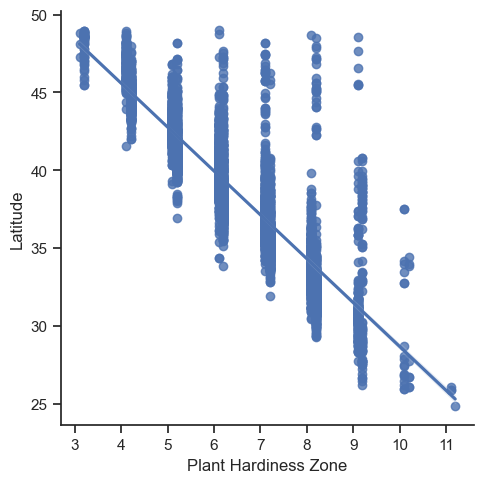

In [239]:
sns.lmplot(x = 'Plant Hardiness Zone', y = 'Latitude', data = df)
plt.savefig("out.png")
plt.show()


## closer to the equator means increase PHZ

# pair plot

In [168]:
# choosing variables 
sub = df_cleaned[['Corn Acres Harvested', 'Sales', 'Latitude', 'Plant Hardiness Zone']]

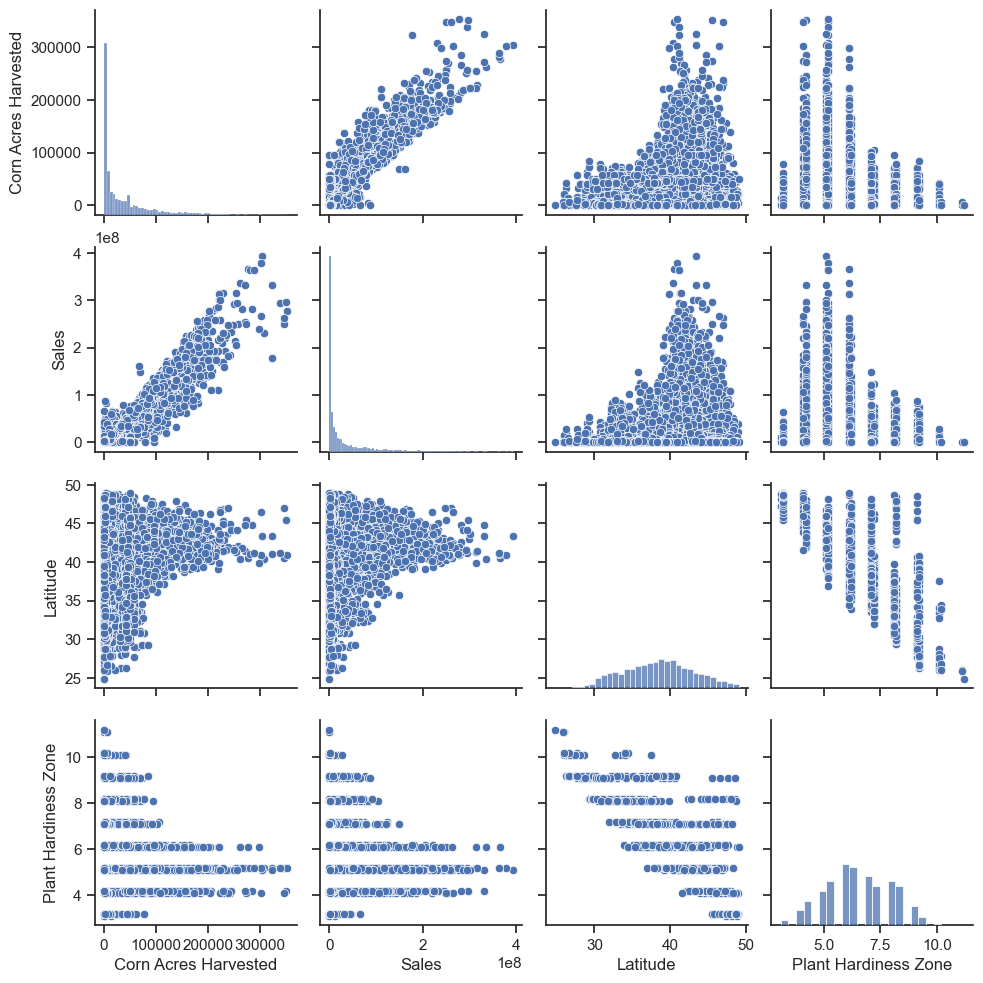

In [241]:
# Create a pair ploat 

g = sns.pairplot(sub)
plt.savefig("out.png")
plt.show()

## categorical plots:

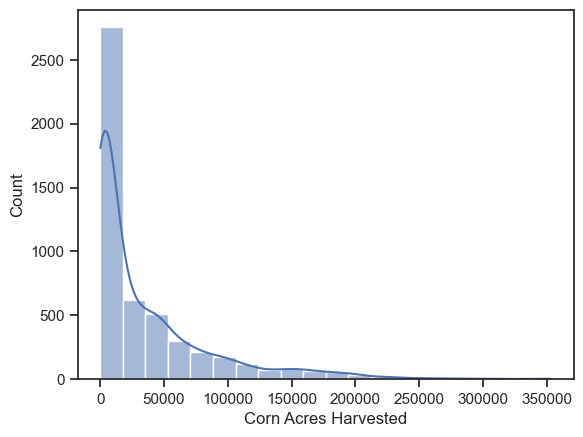

In [243]:
# Use a histogram to visualize the distribution of the variables. 


sns.histplot(df_cleaned['Corn Acres Harvested'], bins = 20, kde = True)
plt.savefig("out.png")
plt.show()

### defining categories

In [173]:
df.loc[df['Corn Acres Harvested'] < 50000, 'Harvest Category'] = 'Small Farm'

In [174]:
df.loc[(df['Corn Acres Harvested'] >= 50000) & (df['Corn Acres Harvested'] < 200000), 'Harvest Category'] = 'Mid-Sized Farm'

In [175]:
df.loc[df['Corn Acres Harvested'] >= 200000, 'Harvest Category'] = 'Large Farm'

In [176]:
df['Harvest Category'].value_counts(dropna = False)

Harvest Category
Small Farm        3836
Mid-Sized Farm    1151
Large Farm          77
Name: count, dtype: int64

In [177]:
df.columns

Index(['Unnamed: 0', 'Year', 'County', 'State', 'Zip Code', 'Latitude',
       'Longitude', 'Plant Hardiness Zone', 'Corn Acres Harvested', 'Sales',
       'CV', 'State ANSI', 'Ag District', 'Ag District Code', 'Concatenated',
       'Harvest Category'],
      dtype='object')

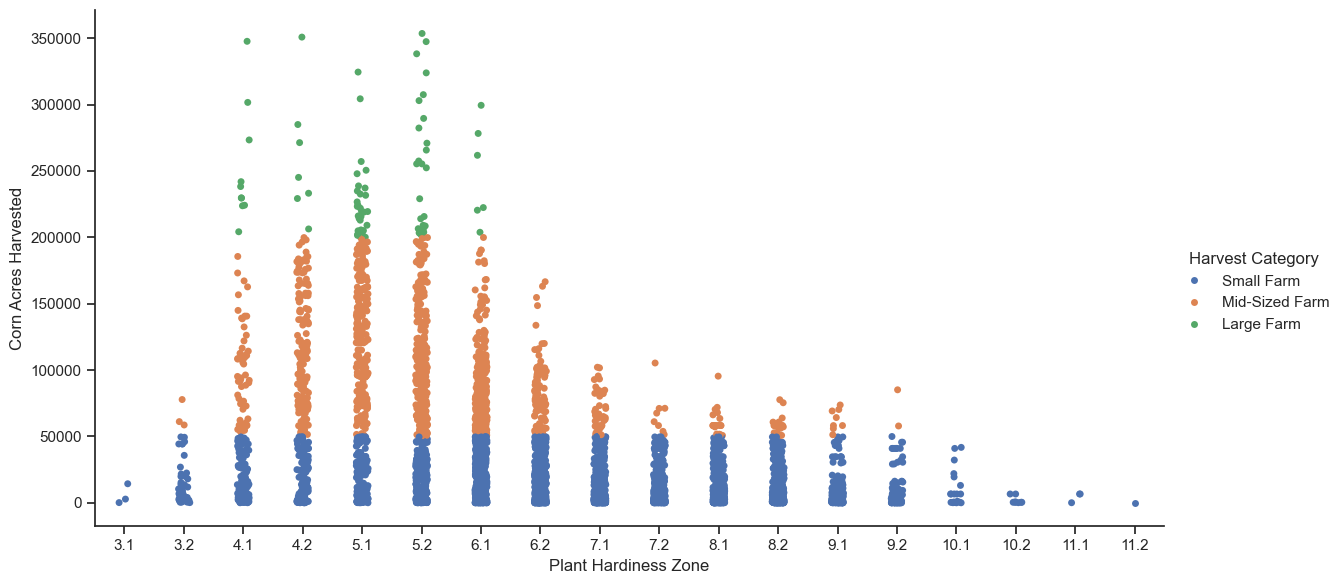

In [178]:
# Create a categorical plot in seaborn using the harvest categories created above

sns.set(style="ticks")
g = sns.catplot(
        x="Plant Hardiness Zone",
        y="Corn Acres Harvested", 
        hue="Harvest Category", 
        data=df,
        height = 6,
        aspect = 2
        )

In [179]:
# exporting:: fig = g.get_figure()
g.savefig("out.png") 
